T =  0.5*m*(r(t)**2*Derivative(theta(t), t)**2 + Derivative(r(t), t)**2)


V =  -g*m*r(t)*cos(theta(t)) + 0.5*k*(-l + r(t))**2


L =  g*m*r(t)*cos(theta(t)) - 0.5*k*(-l + r(t))**2 + 0.5*m*(r(t)**2*Derivative(theta(t), t)**2 + Derivative(r(t), t)**2)


eqR =  -g*m*cos(theta(t)) + 0.5*k*(-2*l + 2*r(t)) - 1.0*m*r(t)*Derivative(theta(t), t)**2 + 1.0*m*Derivative(r(t), (t, 2))


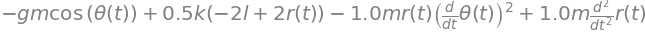

eqTheta =  g*m*r(t)*sin(theta(t)) + 1.0*m*r(t)**2*Derivative(theta(t), (t, 2)) + 2.0*m*r(t)*Derivative(r(t), t)*Derivative(theta(t), t)


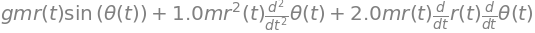

SolR =  [(k*l - k*r(t) + m*(g*cos(theta(t)) + r(t)*Derivative(theta(t), t)**2))/m]


SolTheta =  [-(g*sin(theta(t)) + 2.0*Derivative(r(t), t)*Derivative(theta(t), t))/r(t)]


EqR =  Eq(Derivative(r(t), (t, 2)), (k*l - k*r(t) + m*(g*cos(theta(t)) + r(t)*Derivative(theta(t), t)**2))/m)


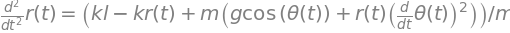

EqTheta =  Eq(Derivative(theta(t), (t, 2)), -(g*sin(theta(t)) + 2.0*Derivative(r(t), t)*Derivative(theta(t), t))/r(t))


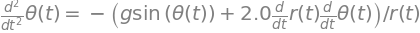

EqR =  Eq(Derivative(r(t), (t, 2)), r(t)*Derivative(theta(t), t)**2 - 2*r(t) + 9.81*cos(theta(t)) + 2)


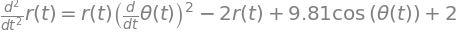

EqTheta =  Eq(Derivative(theta(t), (t, 2)), -(9.81*sin(theta(t)) + 2.0*Derivative(r(t), t)*Derivative(theta(t), t))/r(t))


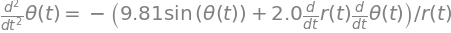

r0 =  5.905


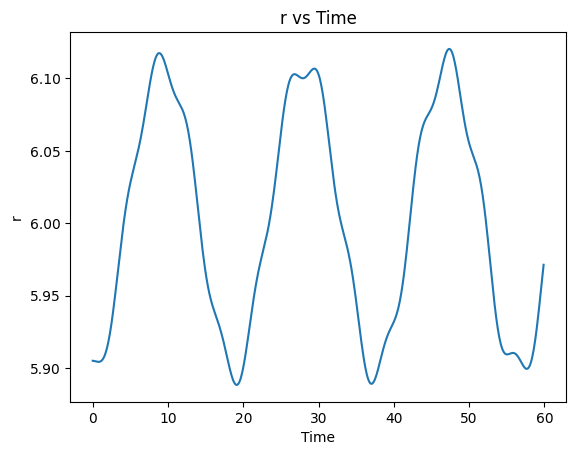

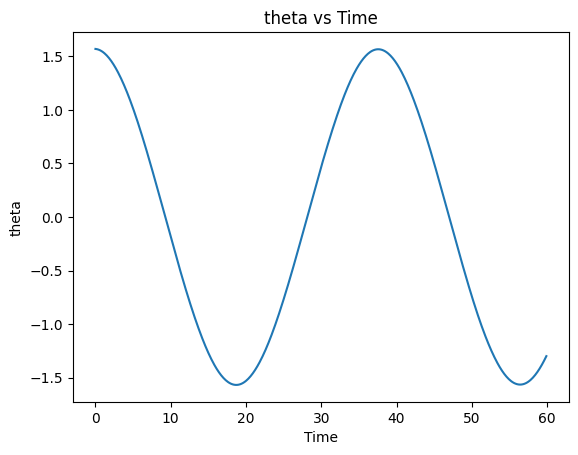

In [9]:
import numpy as np
import sympy as sp


# Define the symbols
from sympy import *

init_printing(use_unicode=True)


# Define the variables
m, k, l, g, t = symbols("m k l g t")

theta = Function("theta")(t)

r = Function("r")(t)


# Kinetic energy (T) and potential energy (V) equations
T = 0.5 * m * (r.diff(t) ** 2 + (r * theta.diff(t)) ** 2)
V = 0.5 * k * (r - l) ** 2 - m * g * r * cos(theta)

print("T = ", T)
display(T)
print("V = ", V)
display(V)


# Lagrangian equation
L = T - V
print("L = ", L)
display(L)


# Euler-Lagrange equation
thetaDot = theta.diff(t)
thetaDdot = thetaDot.diff(t)

rDot = r.diff(t)
rDdot = rDot.diff(t)

eqR = diff(diff(L, rDot), t) - diff(L, r)
eqTheta = diff(diff(L, thetaDot), t) - diff(L, theta)

print("eqR = ", eqR)
display(eqR)
print("eqTheta = ", eqTheta)
display(eqTheta)


# solve the equations
solR = solve(eqR, rDdot)
solTheta = solve(eqTheta, thetaDdot)


eqSolR = Eq(rDdot, solR[0])
eqSolTheta = Eq(thetaDdot, solTheta[0])

print("SolR = ", solR)
display(solR)
print("SolTheta = ", solTheta)
display(solTheta)

print("EqR = ", eqSolR)
display(eqSolR)
print("EqTheta = ", eqSolTheta)
display(eqSolTheta)

# do numerical calculations using euler method

# define values
mVal = 1
kVal = 2
lVal = 1
gVal = 9.81

# input values into the equations
eqSolR = eqSolR.subs({m: mVal, k: kVal, l: lVal, g: gVal})
eqSolTheta = eqSolTheta.subs({m: mVal, k: kVal, l: lVal, g: gVal})

print("EqR = ", eqSolR)
display(eqSolR)
print("EqTheta = ", eqSolTheta)
display(eqSolTheta)

# define the time step
dt = 0.1
t0 = 0
t1 = 60

# define the initial values
r0Val = lVal + (mVal * gVal / kVal)
rDot0Val = 0
theta0Val = np.pi / 2
thetaDot0Val = 0

print("r0 = ", r0Val)

# define the arrays
rArr = [r0Val]
thetaArr = [theta0Val]

# do euler method
tArr = np.arange(t0, t1, dt)


for tVal in tArr:
    rVal = rArr[-1]
    thetaVal = thetaArr[-1]

    calRDot = eqSolR.rhs.subs(
        {r: rVal, rDot: rDot0Val, theta: sp.rad(thetaVal), thetaDot: thetaDot0Val}
    ).evalf()
    calThetaDot = eqSolTheta.rhs.subs(
        {r: rVal, rDot: rDot0Val, theta: sp.rad(thetaVal), thetaDot: thetaDot0Val}
    ).evalf()

    rDotVal = rDot0Val + calRDot * dt
    thetaDotVal = thetaDot0Val + calThetaDot * dt

    rArr.append(rVal + rDotVal * dt)
    thetaArr.append(thetaVal + thetaDotVal * dt)

    rDot0Val = rDotVal
    thetaDot0Val = thetaDotVal

# plot the results
import matplotlib.pyplot as plt

plt.plot(tArr, rArr[1:])
plt.xlabel("Time")
plt.ylabel("r")
plt.title("r vs Time")
plt.show()

plt.plot(tArr, thetaArr[1:])
plt.xlabel("Time")
plt.ylabel("theta")
plt.title("theta vs Time")
plt.show()